GBM Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.85      0.68      0.76        25
           2       0.96      0.94      0.95        82
           3       0.91      0.98      0.94        88
           4       0.73      0.69      0.71        16

    accuracy                           0.91       219
   macro avg       0.87      0.86      0.86       219
weighted avg       0.91      0.91      0.91       219

Isolation Forest Anomaly Detection:
0    198
1     21
Name: count, dtype: int64
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00        25
           2       0.84      0.99      0.91        82
           3       0.77      1.00      0.87        88
           4       0.00      0.00      0.00        16

    accuracy                           0.81       2

/home/gagan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gagan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gagan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


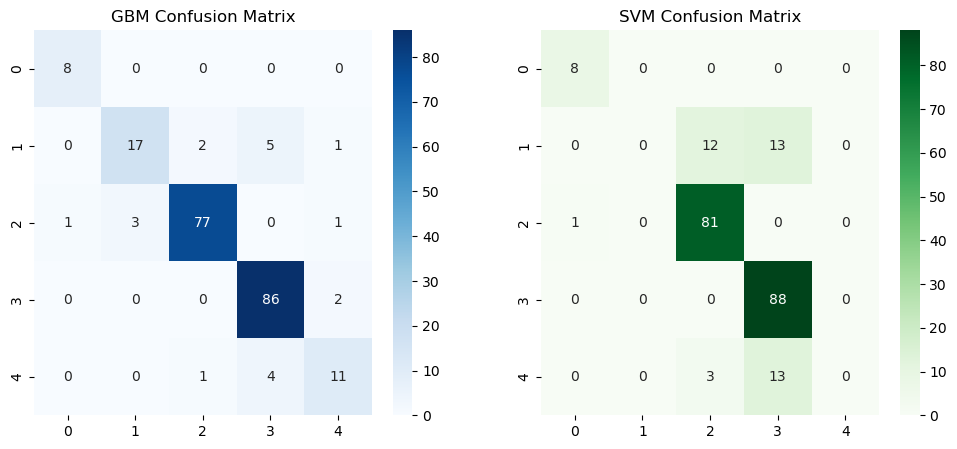

Data Preprocessing & Model Training Completed ✅


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/home/gagan/anaconda_projects/project/Train.csv")

# Identify the target column (assuming it's named 'class' or similar)
target_column = 'class'  # Change this if needed

# Convert categorical labels to numeric values
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Convert all non-numeric data to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features (X) and target (y)
X = df_imputed.drop(columns=[target_column])  # Features
y = df_imputed[target_column].astype(int)  # Ensure target remains categorical

# Normalize numerical features (EXCLUDING target)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Machine Learning Models

# Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

print("GBM Classification Report:")
print(classification_report(y_test, y_pred_gbm))

# Isolation Forest (Anomaly Detection)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)  # No y_train needed
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # Convert anomalies to 1, normal to 0

print("Isolation Forest Anomaly Detection:")
print(pd.Series(y_pred_iso).value_counts())

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_gbm), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("GBM Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")

plt.show()

print("Data Preprocessing & Model Training Completed ✅")


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      0.88      0.93         8
   Injection       0.33      0.10      0.15        20
  Masquerade       0.85      0.97      0.91        80
      Normal       0.80      0.95      0.86        91
      Replay       0.17      0.05      0.08        20

    accuracy                           0.79       219
   macro avg       0.63      0.59      0.59       219
weighted avg       0.72      0.79      0.75       219


Logistic Regression Confusion Matrix:


/home/gagan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


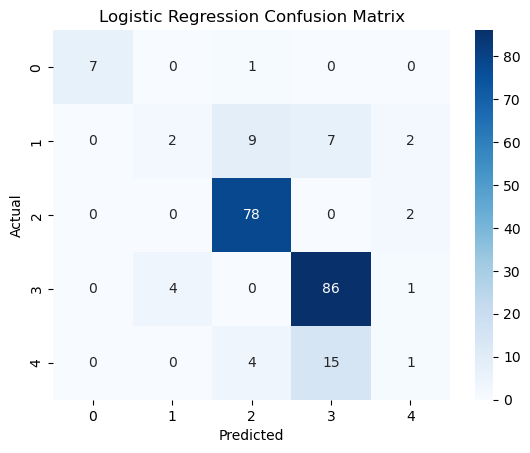

--------------------------------------------------
Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      1.00      1.00         8
   Injection       1.00      0.25      0.40        20
  Masquerade       0.87      1.00      0.93        80
      Normal       0.82      0.98      0.89        91
      Replay       0.67      0.20      0.31        20

    accuracy                           0.85       219
   macro avg       0.87      0.69      0.71       219
weighted avg       0.85      0.85      0.81       219


Random Forest Confusion Matrix:


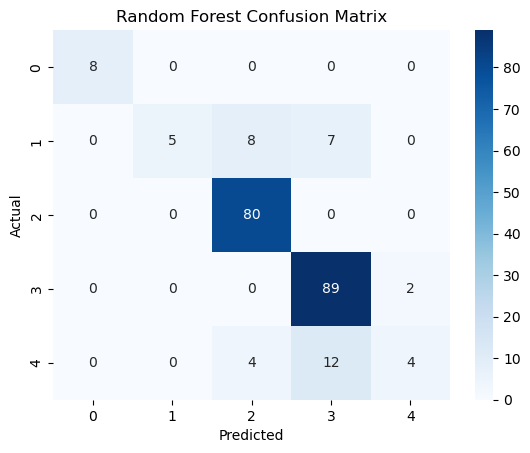

--------------------------------------------------
Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      0.88      0.93         8
   Injection       0.75      0.15      0.25        20
  Masquerade       0.86      1.00      0.92        80
      Normal       0.85      0.99      0.91        91
      Replay       0.67      0.30      0.41        20

    accuracy                           0.85       219
   macro avg       0.83      0.66      0.69       219
weighted avg       0.83      0.85      0.81       219


SVM Confusion Matrix:


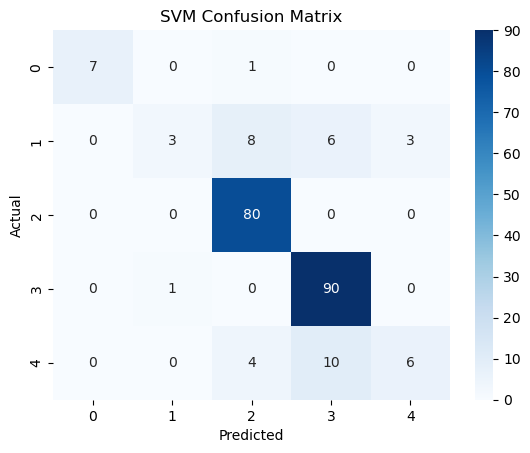

--------------------------------------------------
Training KNN...

KNN Classification Report:
              precision    recall  f1-score   support

       Fault       0.57      1.00      0.73         8
   Injection       0.00      0.00      0.00        20
  Masquerade       0.88      0.95      0.92        80
      Normal       0.78      0.97      0.86        91
      Replay       0.25      0.05      0.08        20

    accuracy                           0.79       219
   macro avg       0.50      0.59      0.52       219
weighted avg       0.69      0.79      0.73       219


KNN Confusion Matrix:


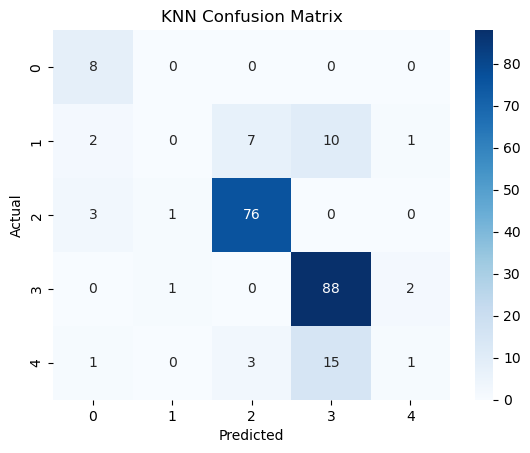

--------------------------------------------------
Model Training and Evaluation Completed ✅


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Load preprocessed dataset
df = pd.read_csv("/home/gagan/anaconda_projects/project/Train.csv")  # Ensure this dataset is preprocessed

# Separate features and target
X = df.drop(columns=['class'])  # Change 'class' if your target column has a different name
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print Evaluation Metrics
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"\n{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("--------------------------------------------------")

print("Model Training and Evaluation Completed ✅")


Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      1.00      1.00         8
   Injection       0.82      0.70      0.76        20
  Masquerade       0.93      0.99      0.96        80
      Normal       0.91      0.97      0.94        91
      Replay       0.75      0.45      0.56        20

    accuracy                           0.90       219
   macro avg       0.88      0.82      0.84       219
weighted avg       0.90      0.90      0.90       219


Gradient Boosting Confusion Matrix:


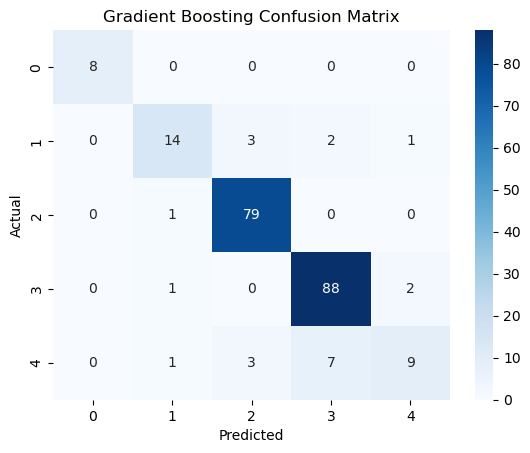

--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8701
[LightGBM] [Info] Number of data points in the train set: 875, number of used features: 49
[LightGBM] [Info] Start training from score -3.277716
[LightGBM] [Info] Start training from score -2.379775
[LightGBM] [Info] Start training from score -1.015322
[LightGBM] [Info] Start training from score -0.877070
[LightGBM] [Info] Start training from score -2.392197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

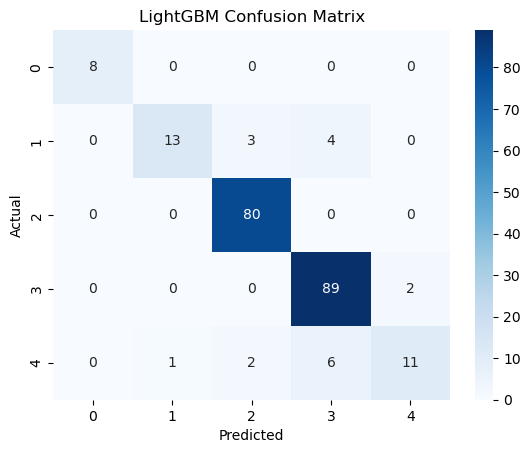

--------------------------------------------------
Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      0.88      0.93         8
   Injection       0.75      0.15      0.25        20
  Masquerade       0.86      1.00      0.92        80
      Normal       0.85      0.99      0.91        91
      Replay       0.67      0.30      0.41        20

    accuracy                           0.85       219
   macro avg       0.83      0.66      0.69       219
weighted avg       0.83      0.85      0.81       219


SVM Confusion Matrix:


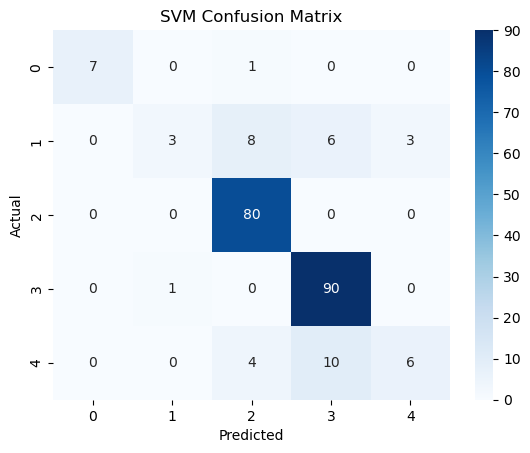

--------------------------------------------------
Model Training and Evaluation Completed ✅


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, OneClassSVM

# Load preprocessed dataset
df = pd.read_csv("/home/gagan/anaconda_projects/project/Train.csv")  # Ensure this dataset is preprocessed

# Separate features and target
X = df.drop(columns=['class'])  # Change 'class' if your target column has a different name
y = df['class']
from sklearn.preprocessing import LabelEncoder

# Encode labels if they contain strings
if df['class'].dtype == 'object':  # Check if target column contains strings
    label_encoder = LabelEncoder()
    df['class'] = label_encoder.fit_transform(df['class'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print Evaluation Metrics
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"\n{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("--------------------------------------------------")

print("Model Training and Evaluation Completed ✅")


Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      1.00      1.00         8
   Injection       0.82      0.70      0.76        20
  Masquerade       0.93      0.99      0.96        80
      Normal       0.91      0.97      0.94        91
      Replay       0.75      0.45      0.56        20

    accuracy                           0.90       219
   macro avg       0.88      0.82      0.84       219
weighted avg       0.90      0.90      0.90       219


Gradient Boosting Confusion Matrix:


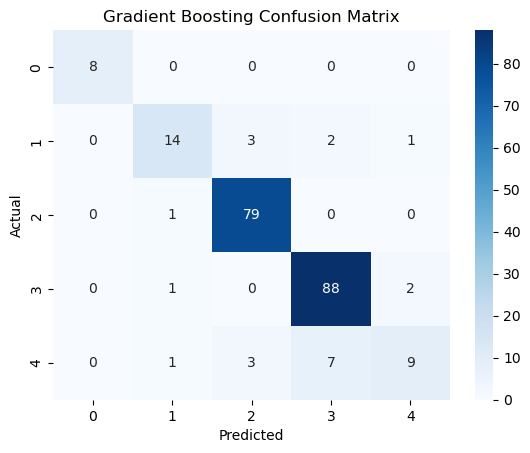

--------------------------------------------------
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8701
[LightGBM] [Info] Number of data points in the train set: 875, number of used features: 49
[LightGBM] [Info] Start training from score -3.277716
[LightGBM] [Info] Start training from score -2.379775
[LightGBM] [Info] Start training from score -1.015322
[LightGBM] [Info] Start training from score -0.877070
[LightGBM] [Info] Start training from score -2.392197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

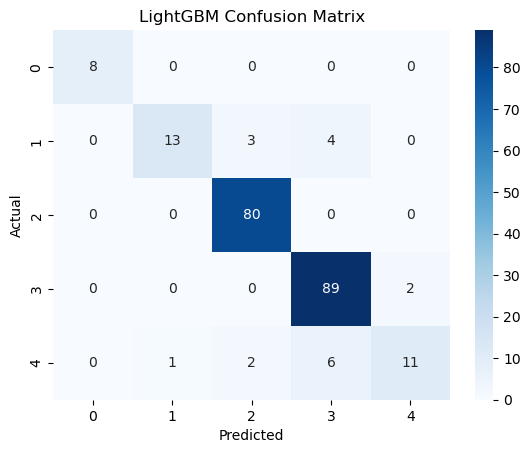

--------------------------------------------------
Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      0.88      0.93         8
   Injection       0.75      0.15      0.25        20
  Masquerade       0.86      1.00      0.92        80
      Normal       0.85      0.99      0.91        91
      Replay       0.67      0.30      0.41        20

    accuracy                           0.85       219
   macro avg       0.83      0.66      0.69       219
weighted avg       0.83      0.85      0.81       219


SVM Confusion Matrix:


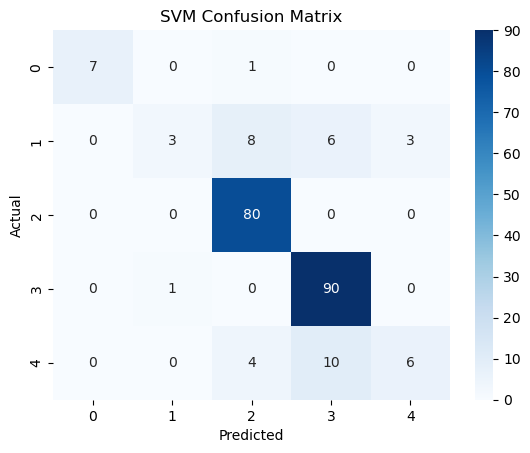

--------------------------------------------------
Model Training and Evaluation Completed ✅


In [14]:
# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    
    # Special handling for One-Class SVM
    if name == "One-Class SVM":
        # Train only on the normal class (assume class 0 is normal, change if needed)
        normal_class = 0  # Change if another class is the normal one
        X_train_ocsvm = X_train[y_train == normal_class]
        
        model.fit(X_train_ocsvm)  # Train only on normal data
        
        # Predict: One-Class SVM outputs +1 (inlier) and -1 (outlier)
        y_pred = model.predict(X_test)
        
        # Convert One-Class SVM predictions (-1 to anomaly class, +1 to normal class)
        y_pred = np.where(y_pred == -1, 1, 0)  # Assuming binary classification
        
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Print Evaluation Metrics
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"\n{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("--------------------------------------------------")

print("Model Training and Evaluation Completed ✅")


In [15]:
def assign_threat_severity(label):
    severity_map = {
        'Normal': 0,       # Low Threat
        'Fault': 1,        # Medium Threat
        'Replay': 1,       # Medium Threat
        'Injection': 2,    # High Threat
        'Masquerade': 2    # High Threat
    }
    return severity_map.get(label, 0)  # Default to Low if label not found

# Apply severity mapping
df['threat_severity'] = df['class'].apply(assign_threat_severity)


In [16]:
from sklearn.cluster import KMeans

# Select relevant features (excluding class & severity)
features = df.drop(columns=['class', 'threat_severity'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['behavior_cluster'] = kmeans.fit_predict(features)

# Check the clustering results
print(df[['class', 'behavior_cluster']].head())


   class  behavior_cluster
0      0                 1
1      0                 1
2      0                 1
3      0                 1
4      0                 1


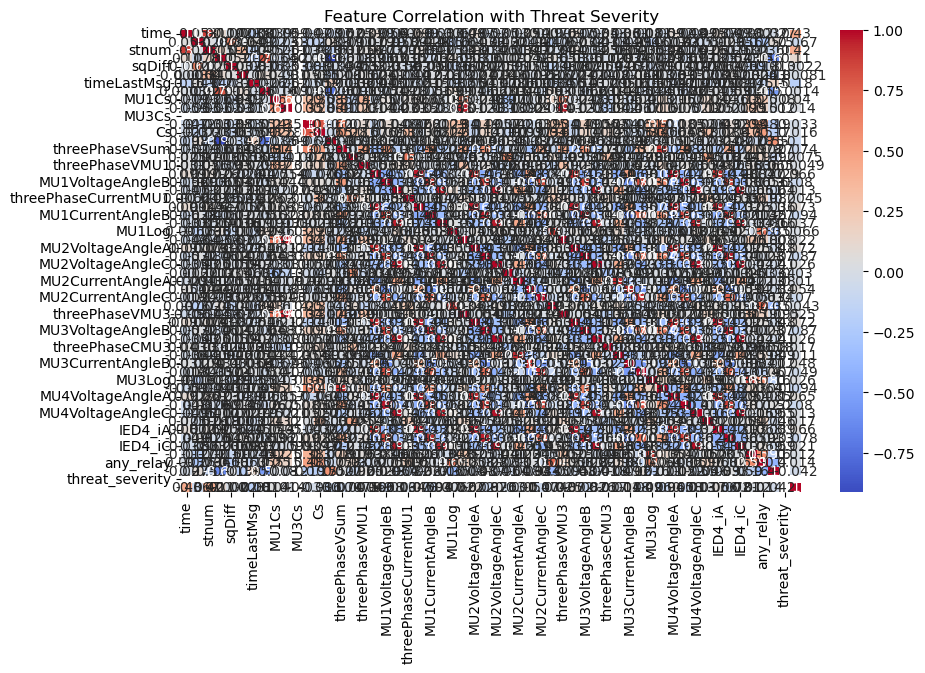

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Threat Severity")
plt.show()


Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      1.00      1.00         8
   Injection       0.82      0.70      0.76        20
  Masquerade       0.93      0.99      0.96        80
      Normal       0.91      0.97      0.94        91
      Replay       0.75      0.45      0.56        20

    accuracy                           0.90       219
   macro avg       0.88      0.82      0.84       219
weighted avg       0.90      0.90      0.90       219


Gradient Boosting Confusion Matrix:


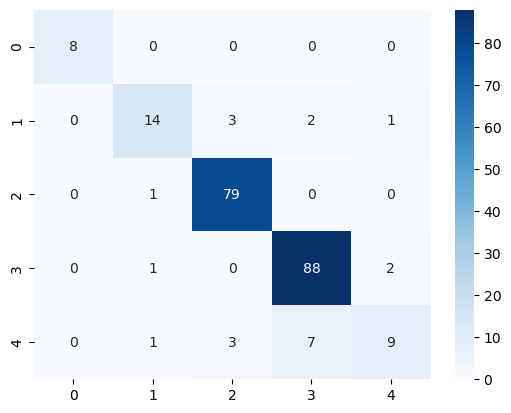

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8701
[LightGBM] [Info] Number of data points in the train set: 875, number of used features: 49
[LightGBM] [Info] Start training from score -3.277716
[LightGBM] [Info] Start training from score -2.379775
[LightGBM] [Info] Start training from score -1.015322
[LightGBM] [Info] Start training from score -0.877070
[LightGBM] [Info] Start training from score -2.392197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

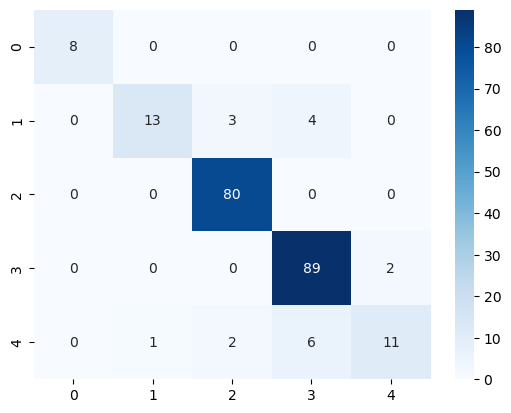

Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

       Fault       1.00      0.88      0.93         8
   Injection       0.75      0.15      0.25        20
  Masquerade       0.86      1.00      0.92        80
      Normal       0.85      0.99      0.91        91
      Replay       0.67      0.30      0.41        20

    accuracy                           0.85       219
   macro avg       0.83      0.66      0.69       219
weighted avg       0.83      0.85      0.81       219


SVM Confusion Matrix:


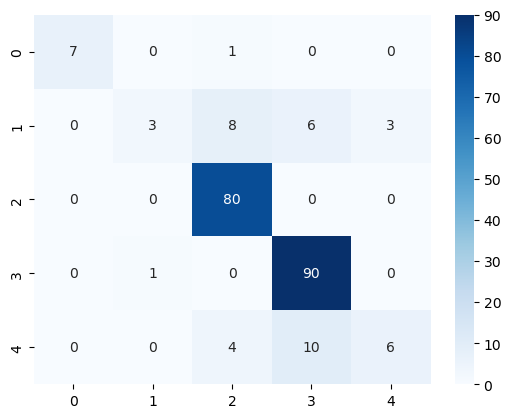

In [18]:
# Add threat severity to feature set
X['threat_severity'] = df['threat_severity']
y = df['class']  # Keeping class labels for classification

# Train and Evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"\n{name} Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()


In [19]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 64.0%
